In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

from datasets.shapenet_data_pc import ShapeNet15kPointClouds

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
chair_dataset = ShapeNet15kPointClouds(
    root_dir="./ShapeNetCore.v2.PC15k",
    categories=["chair"],
    split="train",
    tr_sample_size=2048,
    te_sample_size=2048,
    scale=1.0,
    normalize_per_shape=False,
    normalize_std_per_axis=False,
    random_subsample=True,
)

airplane_dataset = ShapeNet15kPointClouds(
    root_dir="./ShapeNetCore.v2.PC15k",
    categories=["airplane"],
    split="train",
    tr_sample_size=2048,
    te_sample_size=2048,
    scale=1.0,
    normalize_per_shape=False,
    normalize_std_per_axis=False,
    random_subsample=True,
)

car_dataset = ShapeNet15kPointClouds(
    root_dir="./ShapeNetCore.v2.PC15k",
    categories=["car"],
    split="train",
    tr_sample_size=2048,
    te_sample_size=2048,
    scale=1.0,
    normalize_per_shape=False,
    normalize_std_per_axis=False,
    random_subsample=True,
)

Total number of data:4612
Min number of points: (train)2048 (test)2048
Total number of data:2832
Min number of points: (train)2048 (test)2048
Total number of data:2458
Min number of points: (train)2048 (test)2048


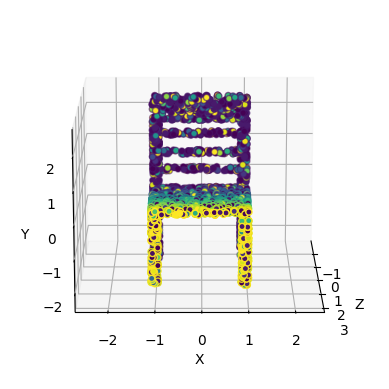

In [19]:
from visuals.visuals_util import visualize_pointcloud

fig = visualize_pointcloud(chair_dataset[13]["train_points"])

In [20]:
point_cloud = chair_dataset[13]["train_points"].numpy()
# point_cloud = car_dataset[1]["train_points"].numpy()
# point_cloud = airplane_dataset[1]["train_points"].numpy()
point_cloud.shape

(2048, 3)

Center: [ 0.04262769  0.13889885 -0.5703852 ], Scale: 5.1009392738342285


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


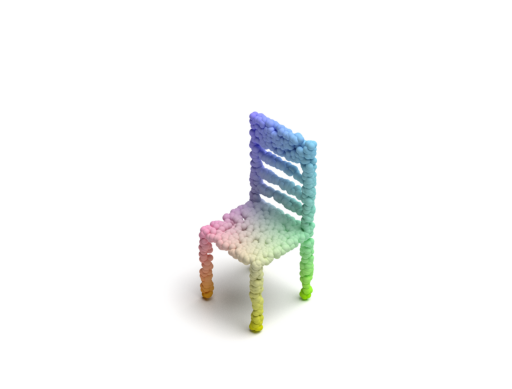

In [21]:
from visuals.mitsuba_vis import render_mitsuba
import matplotlib.pyplot as plt

img = render_mitsuba(point_cloud, "./test.xml", fov=20)

plt.axis("off")
plt.imshow(img ** (1.0 / 2.2)) # approximate sRGB tonemapping
plt.savefig("ground_truth_chair.png", bbox_inches='tight', pad_inches=0, dpi=400)